In [1]:
import seaborn as sns
from glob import glob
import cv2
import pandas as pd

In [2]:
#pngs = glob('/fast/rsna-breast/tiles/224/4110/1284526530*.png')
pngs = glob('/fast/rsna-breast/tiles/224/4110/*.png')
len(pngs)

1736

In [3]:
rows = []
for p in pngs:
    i = cv2.imread(p)
    rows.append(dict(fn=p, std=i.std(),min=i.min(), max=i.max(), mean=i.mean()))

df = pd.DataFrame(rows)
df

,fn,std,min,max,mean
0,/fast/rsna-breast/tiles/224/4110/1284526530_2_...,0.484527,2,4,2.376415
1,/fast/rsna-breast/tiles/224/4110/654240687_4_1...,0.499061,1,2,1.530632
2,/fast/rsna-breast/tiles/224/4110/1284526530_15...,48.517331,0,217,62.857262
3,/fast/rsna-breast/tiles/224/4110/654240687_17_...,13.812903,24,145,57.758809
4,/fast/rsna-breast/tiles/224/4110/1284526530_14...,15.893083,54,195,97.958705
...,...,...,...,...,...
1731,/fast/rsna-breast/tiles/224/4110/1673446890_14...,7.128311,113,171,140.051439
1732,/fast/rsna-breast/tiles/224/4110/1284526530_13...,15.203785,60,195,101.996532
1733,/fast/rsna-breast/tiles/224/4110/162055729_25_...,0.128315,1,3,1.983379
1734,/fast/rsna-breast/tiles/224/4110/1284526530_14...,25.538789,54,207,117.565549


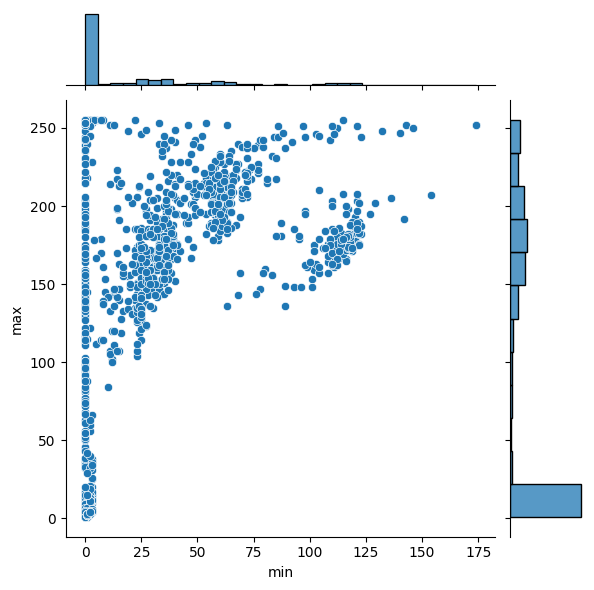

In [18]:
sns.jointplot(df, x='min', y='max')

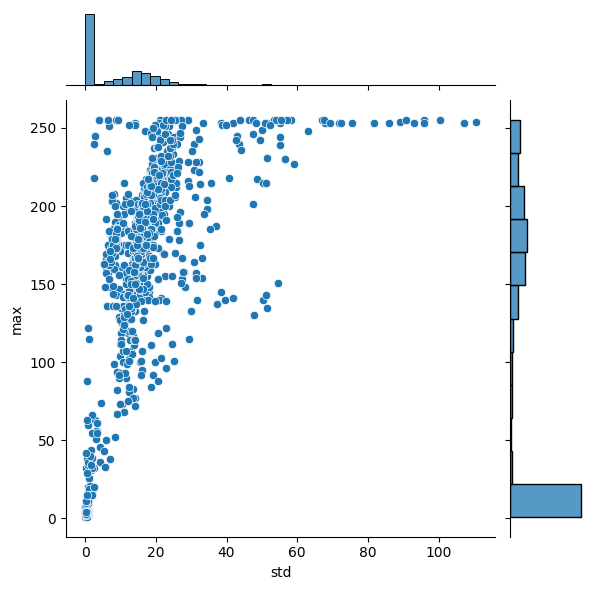

In [23]:
sns.jointplot(df, x='std', y='max')

In [23]:
import numpy as np
def norm(image):
    pic = np.asarray(image)
    # convert from integers to floats
    pic = pic.astype('float32')
    # normalize to the range 0-1
    pic /= pic.max()
    pic*=255
    print(pic.max())
    return PIL.Image.fromarray(pic.astype('uint8'))
    #plt.imshow(pic)

In [25]:
df.shape

(1736, 5)

In [27]:
df[df['max']>50].shape

(890, 5)

255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0


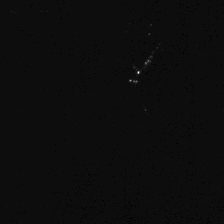

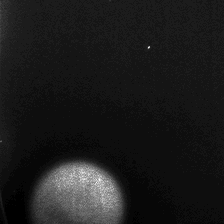

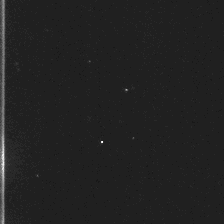

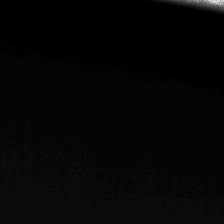

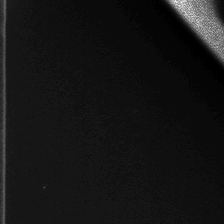

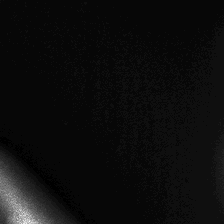

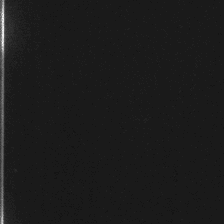

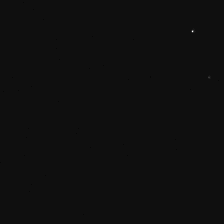

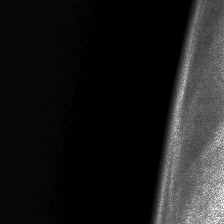

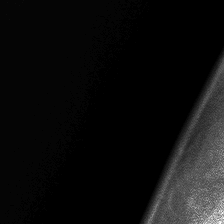

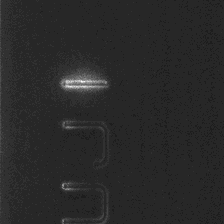

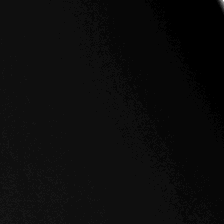

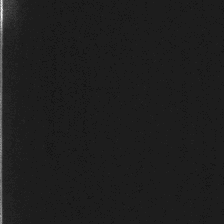

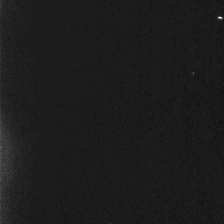

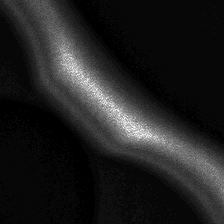

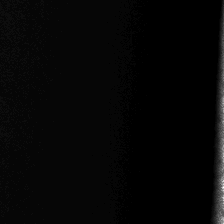

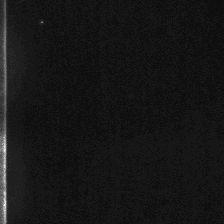

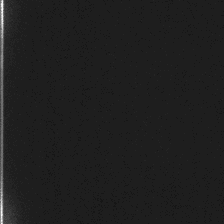

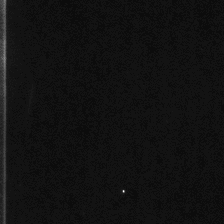

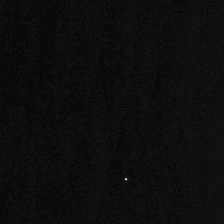

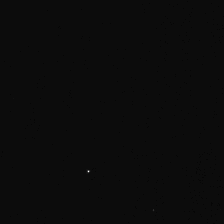

In [24]:
import PIL
filt = (df['max']<50) & (df['max']>25)
images = [ norm(PIL.Image.open(f)) for f in list(df[filt].fn)]
for i in images:
    display(i)

In [ ]:
import PIL
images = [ PIL.Image.open(f) for f in list(df[df['max']<50].fn) ]
for i in images:
    display(i)

In [30]:
stats = pd.read_csv('/fast/rsna-breast/tile_224_stats.csv')
stats.shape

(5498932, 8)

In [33]:
stats.to_feather('/fast/rsna-breast/tile_224_stats.feather')

In [34]:
stats = pd.read_feather('/fast/rsna-breast/tile_224_stats.feather')

In [35]:
stats

,ptID,imgID,row,col,min,max,std,mean
0,35652,396250972,1,5,19,135,13.104088,47.943678
1,35652,396250972,17,0,0,241,69.920733,84.658243
2,35652,1977904795,8,10,30,169,17.355816,75.467415
3,35652,396250972,13,1,0,239,66.863707,58.280453
4,35652,396250972,3,5,22,151,16.275129,53.105688
...,...,...,...,...,...,...,...,...
5498927,26605,173127812,6,2,127,183,7.381448,152.642140
5498928,26605,1688691532,18,2,0,140,31.583035,101.123505
5498929,26605,307322720,3,6,109,165,6.882298,132.445233
5498930,26605,1688691532,15,1,109,178,9.029404,137.110312


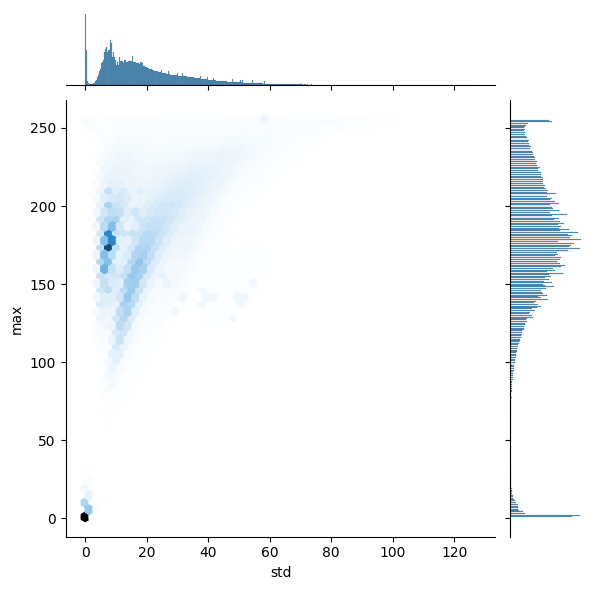

In [36]:
sns.jointplot(stats, x='std', y='max', kind='hex')

In [37]:
stats.shape

(5498932, 8)

In [38]:
stats[stats['max']<50].shape

(246822, 8)

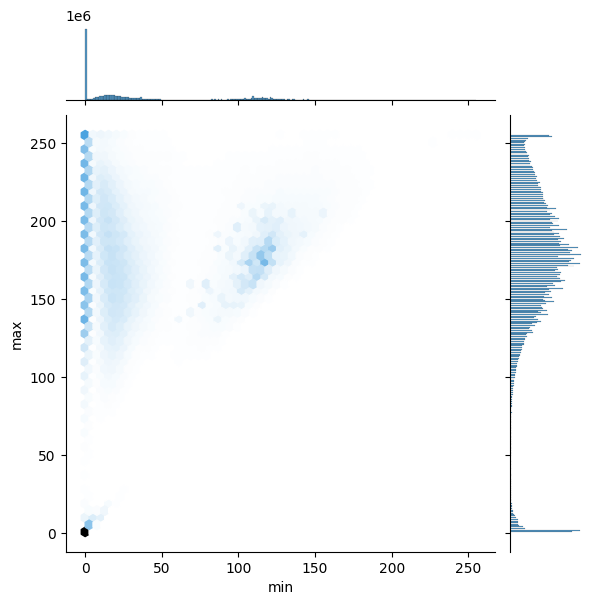

In [39]:
sns.jointplot(stats, x='min', y='max', kind='hex')

### sns.jointplot(stats, x='mean', y='std', kind='hex')